In [159]:
import pandas as pd
import numpy as np

In [160]:
df = pd.read_csv("./datasets/car_insurance.csv")
df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [162]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [163]:

df['INCOME'] = df['INCOME'].str.replace('$', '').str.replace(',', '').astype(float)
df['HOME_VAL'] = df['HOME_VAL'].str.replace('$', '').str.replace(',', '').astype(float)
df["CLM_AMT"] = df["CLM_AMT"].str.replace('$', '').str.replace(',', '').astype(float)
df["BLUEBOOK"] = df["BLUEBOOK"].str.replace('$', '').str.replace(',', '').astype(float)
df["OLDCLAIM"] = df["OLDCLAIM"].str.replace('$', '').str.replace(',', '').astype(float)

df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)
df["INCOME"].fillna(df["INCOME"].median(), inplace=True)
df["YOJ"].fillna(df["YOJ"].median(), inplace=True)
df["CAR_AGE"].fillna(df["CAR_AGE"].mode()[0], inplace=True)
df["HOME_VAL"].fillna(df["HOME_VAL"].median(), inplace=True)
df.dropna(subset=['AGE'], inplace=True)

/tmp/ipykernel_9913/3579901345.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['INCOME'] = df['INCOME'].str.replace('$', '').str.replace(',', '').astype(float)
/tmp/ipykernel_9913/3579901345.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HOME_VAL'] = df['HOME_VAL'].str.replace('$', '').str.replace(',', '').astype(float)
/tmp/ipykernel_9913/3579901345.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["CLM_AMT"] = df["CLM_AMT"].str.replace('$', '').str.replace(',', '').astype(float)
/tmp/ipykernel_9913

In [164]:
df.isnull().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10295 non-null  int64  
 1   KIDSDRIV    10295 non-null  int64  
 2   BIRTH       10295 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10295 non-null  int64  
 5   YOJ         10295 non-null  float64
 6   INCOME      10295 non-null  float64
 7   PARENT1     10295 non-null  object 
 8   HOME_VAL    10295 non-null  float64
 9   MSTATUS     10295 non-null  object 
 10  GENDER      10295 non-null  object 
 11  EDUCATION   10295 non-null  object 
 12  OCCUPATION  10295 non-null  object 
 13  TRAVTIME    10295 non-null  int64  
 14  CAR_USE     10295 non-null  object 
 15  BLUEBOOK    10295 non-null  float64
 16  TIF         10295 non-null  int64  
 17  CAR_TYPE    10295 non-null  object 
 18  RED_CAR     10295 non-null  object 
 19  OLDCLAIM    10295 non-nul

In [166]:
df.drop('BIRTH', axis=1, inplace=True)

In [167]:
df["PARENT1"] = df["PARENT1"].replace({"Yes": 1, "No": 0})


In [168]:
df["MSTATUS"] = df["MSTATUS"].replace({"Yes": 1, "z_No": 0})

In [169]:
df["GENDER"] = df["GENDER"].replace({"z_F": 0, "M": 1})

In [170]:
df["CAR_USE"] = df["CAR_USE"].replace({"Private": 0, "Commercial": 1})

In [171]:
df["RED_CAR"] = df["RED_CAR"].replace({"yes": 1, "no": 0})

In [172]:
df["REVOKED"] = df["REVOKED"].replace({"Yes": 1, "No": 0})

In [173]:
# df["EDUCATION"] = df["EDUCATION"].replace({"<High School": 0, "z_High School": 1, "Bachelors": 2, "Masters": 3, "PhD": 4})

In [174]:
df = pd.get_dummies(df, columns=['EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'URBANICITY'], drop_first=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 10301
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10295 non-null  int64  
 1   KIDSDRIV                          10295 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10295 non-null  int64  
 4   YOJ                               10295 non-null  float64
 5   INCOME                            10295 non-null  float64
 6   PARENT1                           10295 non-null  int64  
 7   HOME_VAL                          10295 non-null  float64
 8   MSTATUS                           10295 non-null  int64  
 9   GENDER                            10295 non-null  int64  
 10  TRAVTIME                          10295 non-null  int64  
 11  CAR_USE                           10295 non-null  int64  
 12  BLUE

In [178]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Load data into a Pandas DataFrame
silhouette_scores_by_k = {}
# Define range of cluster counts to try
cluster_counts = range(2, 11)

# Iterate over cluster counts and perform clustering
for n_clusters in cluster_counts:
    # Initialize KMeans model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=76)

    # Fit KMeans model to data
    kmeans.fit(df)

    # Get cluster labels and silhouette score
    labels = kmeans.labels_
    score = silhouette_score(df, labels)
    silhouette_scores_by_k[n_clusters] = score
    # Print results
    print(f"Cluster count: {n_clusters}, Silhouette score: {score}")

/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 2, Silhouette score: 0.6251738782812966


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 3, Silhouette score: 0.5873179595878854


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 4, Silhouette score: 0.5716445067342424


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 5, Silhouette score: 0.5634951630337182


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 6, Silhouette score: 0.5514344495455665


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 7, Silhouette score: 0.5497941192041639


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 8, Silhouette score: 0.5482999326945858


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 9, Silhouette score: 0.5469579869298282


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster count: 10, Silhouette score: 0.5463003769792311


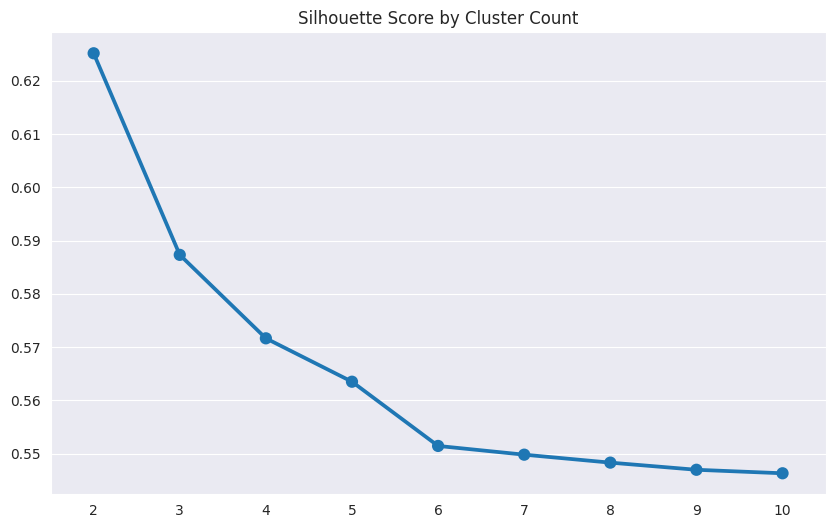

In [179]:
# Plot silhouette scores by cluster count using seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.pointplot(x=list(silhouette_scores_by_k.keys()),
              y=list(silhouette_scores_by_k.values()))
plt.title("Silhouette Score by Cluster Count")
plt.show()


In [183]:
kmeans = KMeans(n_clusters=2, random_state=76)
kmeans.fit(df)
labels = kmeans.labels_

/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


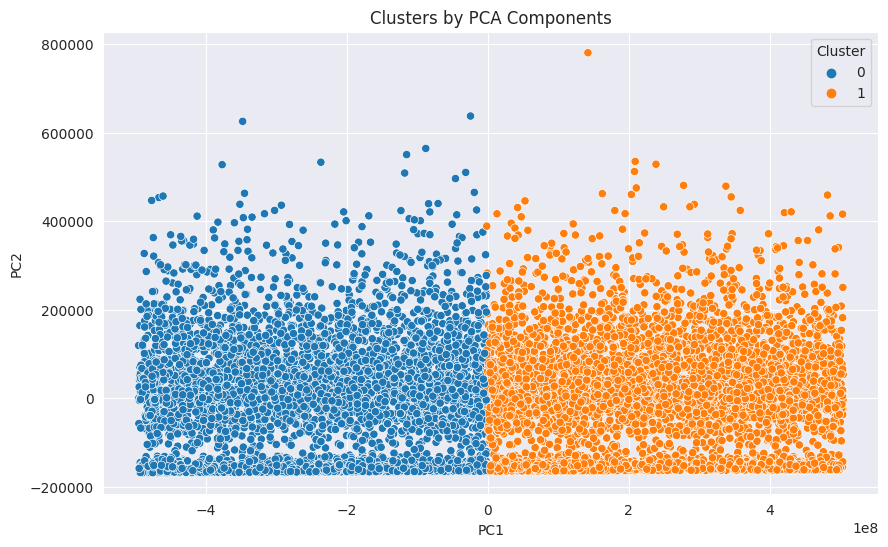

In [184]:
# Visualize Clusters in 2D Scatter Plot Using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p_components = pca.fit_transform(df)
pca_df = pd.DataFrame(p_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Plot clusters
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df)
plt.title("Clusters by PCA Components")
plt.show()


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10295 samples in 0.022s...


[t-SNE] Computed neighbors for 10295 samples in 3.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10295
[t-SNE] Computed conditional probabilities for sample 2000 / 10295
[t-SNE] Computed conditional probabilities for sample 3000 / 10295
[t-SNE] Computed conditional probabilities for sample 4000 / 10295
[t-SNE] Computed conditional probabilities for sample 5000 / 10295
[t-SNE] Computed conditional probabilities for sample 6000 / 10295
[t-SNE] Computed conditional probabilities for sample 7000 / 10295
[t-SNE] Computed conditional probabilities for sample 8000 / 10295
[t-SNE] Computed conditional probabilities for sample 9000 / 10295
[t-SNE] Computed conditional probabilities for sample 10000 / 10295
[t-SNE] Computed conditional probabilities for sample 10295 / 10295
[t-SNE] Mean sigma: 780133.002925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.883694
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752

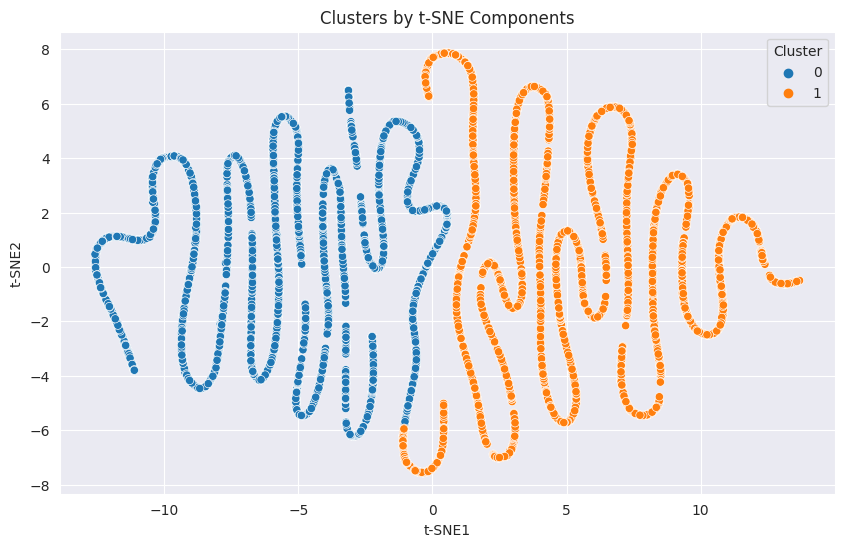

In [191]:
# Visualize Clusters in 2D Scatter Plot Using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=250)
tsne_components = tsne.fit_transform(df)
tsne_df = pd.DataFrame(tsne_components, columns=['t-SNE1', 't-SNE2'])
tsne_df['Cluster'] = labels

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=tsne_df)
plt.title("Clusters by t-SNE Components")
plt.show()
